# 퍼셉트론의 원리
> 퍼셉트론은 입력측과 출력측으로 구성된다. 입력층에는 d+1개의 노드가 있다.(d는 특징 벡터의 차원)

> 입력층의 i번째 노드와 출력층의 노드는 가중치 w를 갖는 에지로 연결된다. i번째 에지는 특징 x 와 가중치 w를 곱해 출력노드로 전달한다.

> 0번째 노드의 입력 x는 항상 1인데, 이 노드를 바이어스 노드(bias)라 부른다.

> 출력노드는 d+1개의 곱셈 결과를 모두 더한 s를 계산한다. 그리고 s를 활성 함수에 적용한 결과를 출력 o로 내보낸다.

> s > 0  -->  1

> s <= 0 --> -1

# 퍼셉트론 학습 알고리즘
> 퍼셉트론을 학습하려면 손실함수 J를 설계해야하며 손실함수 값을 낮추는 방향을 찾아야한다.

## 손실 함수 설계
1. w가 훈련 집합에 있는 샘플을 모두 맞히면, 즉 정활률이 100%이면 J(w)(손실함수)는 0이다.
2. w가 틀리는 샘플이 많을수록 J(w)의 값이 크다.

In [1]:
from sklearn.linear_model import Perceptron

X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

p=Perceptron() #객체 생성
p.fit(X,y) # 학습

print("학습된 퍼셉트론의 매개변수: ",p.coef_,p.intercept_) # p.coef_ : 가중치1~가중치2 intercept_ : 가중치0
print("훈련 집합에 대한 예측: ",p.predict(X))
print("정확률 측정: ",p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련 집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


## 필기 숫자 데이터 인식

In [ ]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np

digit=datasets.load_digits()
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6) # 훈련/테스트 집합으로 분할

p=Perceptron(max_iter=100,eta0=0.001,verbose=0)# Perceptron객체 생성
p.fit(x_train, y_train) # 학습

res = p.predict(x_test) # 예측

conf = np.zeros((10,10)) # 혼동행렬
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

no_correct = 0 # 맞은 샘플의 수
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy*100,"%입니다.")


## 기계 학습의 디자인 패턴
> 의미 없는 일의 반복을 뜻하는 '바퀴의 재발명'을 피하려면 어느 분야든지 패턴을 잘 활용해야 한다.
* sklearn의 디자인 패턴
    
    데이터 읽기 --> 모델 객체 생성 --> 모델 학습 --> 예측 --> 성능평가

# 다층 퍼셉트론
퍼셉트론은 선형 분류기라는 근본적인 한계가 있어서 선형 분리가 불가능한 상황에서 낮은 성능을 보인다.
그 한계를 극복하기 위한 것이 바로 다층 퍼셉트론이다.

## 특징 공간 변환
퍼셉트론을 여러개 사용하면 새로운 특징 공간을 만들어 원래 공간에서는 선형 분리가 불가능하던 것을 가능하게 만든다.

## 다층 퍼셉트론의 구조
> 다층 퍼셉트론은 입력층, 은닉층, 출력층으로 구성된다.

> 데이터가 주어지면 입력층의 노드 수와 출력층의 노드 수는 자동으로 정해진다.

> 은닉층의 노드 개수는 하이퍼 매개변수이다. 은닉층의 노드 수가 많으면 신경망의 용량이 커져서 복잡한 데이터를 모델링하는데는 유리하지만, 학습이 오래걸리고 과잉적합이 나타날 가능성이 크다

# 오류 역전파 알고리즘
> 다층 퍼셉트론을 학습하려면 퍼셉트론과 마찬가지로 손실함수를 정의하고 손실 함수의 최적점을 찾는 최적화 알고리즘을 고안해야 한다.


# 다층 퍼셉트론 프로그래밍
## sklearn의 필기 숫자 데이터셋

In [4]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

digit=datasets.load_digits()
x_train, x_test, y_train, y_test=train_test_split(digit.data,digit.target,train_size=0.6) # 훈련/테스트집합 분할

mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
# hidden_layer_sizes : 은닉층의 크기
# learning_rate_init : 학습률 초깃값
# batch_size : 배치 크기
# max_iter : 에포크 횟수(최대 몇번 돌릴건지)
# solver : 경사 하강법 알고리즘의 종류 (sgd : stochastic gradient descent)
# verbose : 진행 메시지 출력 여부
mlp.fit(x_train,y_train) #학습

res=mlp.predict(x_test) #예측

#혼동행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

#정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ",accuracy*100,"%입니다.")

Iteration 1, loss = 2.17161661
Iteration 2, loss = 0.33034530
Iteration 3, loss = 0.21029193
Iteration 4, loss = 0.16289602
Iteration 5, loss = 0.14155698
Iteration 6, loss = 0.11708756
Iteration 7, loss = 0.09953593
Iteration 8, loss = 0.08528539
Iteration 9, loss = 0.08349285
Iteration 10, loss = 0.07248814
Iteration 11, loss = 0.06477120
Iteration 12, loss = 0.06049482
Iteration 13, loss = 0.05539430
Iteration 14, loss = 0.05102397
Iteration 15, loss = 0.04828605
Iteration 16, loss = 0.04767732
Iteration 17, loss = 0.04152829
Iteration 18, loss = 0.04007246
Iteration 19, loss = 0.03835793
Iteration 20, loss = 0.03475521
Iteration 21, loss = 0.03396819
Iteration 22, loss = 0.03552277
Iteration 23, loss = 0.03085171
Iteration 24, loss = 0.02842405
Iteration 25, loss = 0.02741303
Iteration 26, loss = 0.02678203
Iteration 27, loss = 0.02551091
Iteration 28, loss = 0.02526601
Iteration 29, loss = 0.02330905
Iteration 30, loss = 0.02247823
Iteration 31, loss = 0.02222515
Iteration 32, los

## MNIST 데이터셋으로 확장

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist=fetch_openml('mnist_784')
mnist.data=mnist.data/255.0
x_train=mnist.data[:60000]; x_test=mnist.data[60000:]
y_train=np.int16(mnist.target[:60000]); y_test=np.int16(mnist.target[60000:]); 

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=512,max_iter=300,solver="adam",verbose=True)
# hidden_layer_sizes : 은닉층의 크기
# learning_rate_init : 학습률 초깃값
# batch_size : 배치 크기
# max_iter : 에포크 횟수(최대 몇번 돌릴건지)
# solver : 경사 하강법 알고리즘의 종류
# verbose : 진행 메시지 출력 여부
mlp.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp.predict(x_test)

#혼동행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

#정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ",accuracy*100,"%입니다.")


Iteration 1, loss = 0.62363114
Iteration 2, loss = 0.26275690
Iteration 3, loss = 0.20485543
Iteration 4, loss = 0.16943145
Iteration 5, loss = 0.14498372
Iteration 6, loss = 0.12619363
Iteration 7, loss = 0.11212430
Iteration 8, loss = 0.10090834
Iteration 9, loss = 0.09042812
Iteration 10, loss = 0.08244439
Iteration 11, loss = 0.07524623
Iteration 12, loss = 0.06969704
Iteration 13, loss = 0.06306259
Iteration 14, loss = 0.05960088
Iteration 15, loss = 0.05385117
Iteration 16, loss = 0.05083298
Iteration 17, loss = 0.04695217
Iteration 18, loss = 0.04344702
Iteration 19, loss = 0.04025003
Iteration 20, loss = 0.03781198
Iteration 21, loss = 0.03489200
Iteration 22, loss = 0.03212986
Iteration 23, loss = 0.02971698
Iteration 24, loss = 0.02832562
Iteration 25, loss = 0.02611589
Iteration 26, loss = 0.02467066
Iteration 27, loss = 0.02292186
Iteration 28, loss = 0.02114101
Iteration 29, loss = 0.01975866
Iteration 30, loss = 0.01816454
Iteration 31, loss = 0.01723203
Iteration 32, los

# 하이퍼 매개변수 최적화
* hidden_layer_sizes = (100)
> 다층 퍼셉트론의 구조를 제어하는 하이퍼 매개변수이다 노드가 100개인 은닉층 하나를 두라는 뜻이다.

> 만약 hidden_layer_sizes = (100,80)으로 설정하면 노드가 100개인 은닉층과 80개인 은닉층을 두어 은닉층이 2개인 다층 퍼셉트론이 된다.

## 단일 하이퍼 매개변수 최적화: validation_curve 함수 이용

하이퍼 매개변수 최적화에 걸린시간은  127.3197181224823 초 입니다.


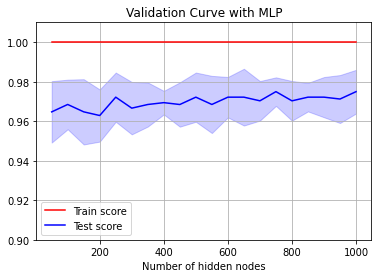

\최적의 은닉층 노드 개수는 750 개 입니다.

[[98.  0.  0.  0.  3.  0.  0.  0.  0.  0.]
 [ 0. 57.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0. 63.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 75.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 79.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0. 66.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  4.  0. 63.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 55.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1. 64.  1.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0. 80.]]
테스트 집합에 대한 정확률은  97.35744089012516 %입니다.


In [6]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 성능 평가(소요 시간 측정 포함)
start=time.time()
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50) # 조사할 범위(은닉층의 노드 수 50 ~ 1000 까지 50씩 늘려가면서)

# 지정한 범위에 있는 조사점 각각에 대해 학습을 수행하고 성능을 측정
# cv=10 10-겹 교차검증
# scoring='accuracy' 성능측정을 위해 정확률을 사용
# n_jobs=8 코어를 8개를 사용해 병렬 처리 -> 값이 클수록 빠른 처리가능
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=8)
# train_score, test_score에는 각각의 조사점에 대해 10-겹 교차검증으로 얻은 10개의 정확률을 담고 있다.

end=time.time()
print("하이퍼 매개변수 최적화에 걸린시간은 ",end-start,"초 입니다.")

# 교차 검증 결과의 평균과 분산 구하기
train_mean=np.mean(train_score,axis=1)
train_std=np.std(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
test_std=np.std(test_score,axis=1)

# 성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes")
plt.ylim(0.9,1.01)
plt.grid(axis="both")
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 수
print("\최적의 은닉층 노드 개수는",best_number_nodes,"개 입니다.\n")

# 최적의 은닉 노드 수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

#혼동행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

#정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ",accuracy*100,"%입니다.")

